# Principle Component Analysis (PCA)

* Unsupervised learning method
* Difficult to understand components beyond which have highest variance
* Good step to do at end of processing because of way data gets transformed and reshaped

References:

* [Dimensionality Reduction in Python](https://campus.datacamp.com/courses/dimensionality-reduction-in-python/feature-extraction)

In [68]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## Made up example

In [12]:
df = pd.DataFrame({
    'low_variance': np.random.normal(100, 1, 10),
    'high_variance': np.random.normal(100, 50, 10),
    'medium_variance': np.random.normal(100, 10, 10)
})

print("Original:\n")
print(df)

pca = PCA()
arr = pca.fit_transform(df)

print("\nAfter PCA:\n")
print(arr)

print("\nExplained Variance Ratio:\n")
print(pca.explained_variance_ratio_)

print("\nExplained Variance:\n")
print(pca.explained_variance_)

Original:

   low_variance  high_variance  medium_variance
0     101.44938       46.18649         98.25445
1     100.36761       35.06806        112.68951
2     100.23741      259.01543         99.88463
3      99.79540       81.80386        109.93530
4     101.55765      202.79407        110.34496
5     101.22617      165.08164         87.66391
6     101.21623       58.71014        106.00636
7      99.67707       92.60716         94.70313
8      99.60718       92.80175        103.78796
9     100.05135      121.94645         99.96723

After PCA:

[[-6.92784835e+01  5.94858026e+00  9.87706687e-01]
 [-8.07843968e+01 -8.18464077e+00 -2.55745715e-02]
 [ 1.43427019e+02 -1.44120444e+00 -4.41335733e-01]
 [-3.39919099e+01 -6.69755311e+00 -6.57695269e-01]
 [ 8.69449483e+01 -1.03720900e+01  9.79096975e-01]
 [ 4.98592119e+01  1.33190442e+01  5.97973712e-01]
 [-5.69692898e+01 -2.14001728e+00  7.71916900e-01]
 [-2.27808454e+01  8.23631439e+00 -8.47308801e-01]
 [-2.28320464e+01 -8.50657038e-01 -8.816

* Notice how most of the variance is explained by one feature (the high variance one).
* The order of `explained_variance_` and `explained_variance_ratio_` _do not_ necessarilly line up with the order of the features in the original data frame. They're ordered by the variance of the original features.
* By default PCA uses the same number of components as features, but can be reduced by setting `n_components`
* Explained Variance Ratio: Percentage of variance explained by each of the selected components (adds up to 1)
* Explained Variance: The amount of variance explained by each of the selected components.

## Charting the variance

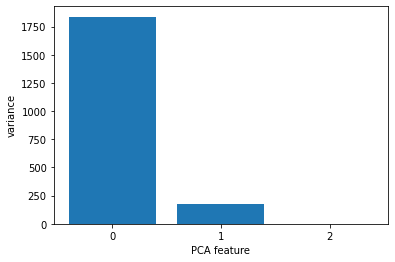

In [7]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

## Titantic data

In [80]:
df = pd.read_csv("data/titantic-train.csv").dropna()

display(df.head())

y = df['Survived']
X = df[['Age', 'Fare', 'Pclass', 'SibSp']]

display(X.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.28330,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.10000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.86250,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00000,1,1,PP 9549,16.70000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00000,0,0,113783,26.55000,C103,S


,Age,Fare,Pclass,SibSp
1,38.00000,71.28330,1,1
3,35.00000,53.10000,1,1
6,54.00000,51.86250,1,0
10,4.00000,16.70000,3,1
11,58.00000,26.55000,1,0


## Pair plot of original data

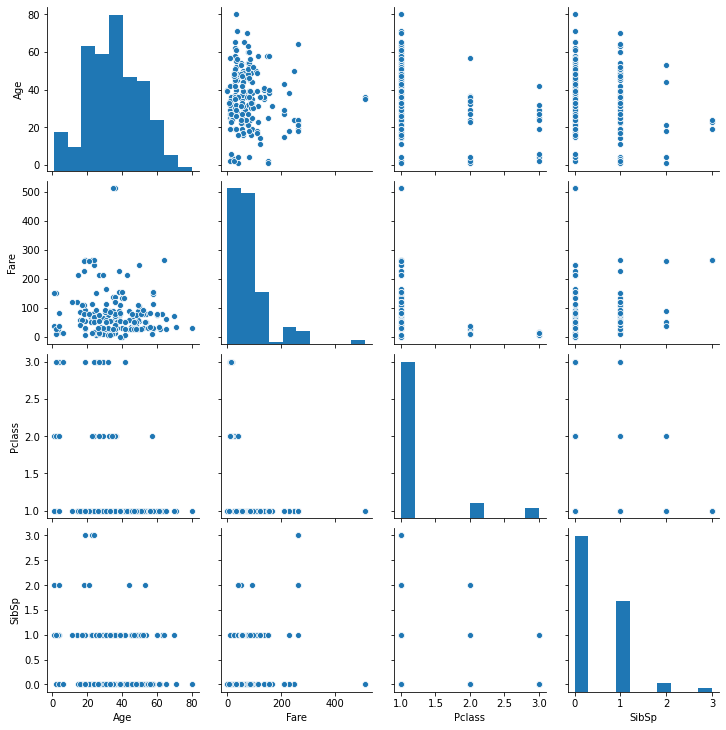

In [44]:
sns.pairplot(X)
plt.show()

## Scaling the data

In [45]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

display(X_std[:3,:])

array([[ 0.14906507, -0.0971798 , -0.37225618,  0.83362754],
       [-0.0432295 , -0.3359971 , -0.37225618,  0.83362754],
       [ 1.17463611, -0.35225028, -0.37225618, -0.7230443 ]])

## PCA analyais

In [47]:
pca = PCA()
pc = pca.fit_transform(X_std)
pc_df = pd.DataFrame(pc, columns=["PC1", "PC2", "PC3", "PC4"])
display(pc_df.head())

print("\nExplained Variance Ratio:\n")
print(pca.explained_variance_ratio_)

print("\nCumulative Explained Variance Ratio:\n")
print(pca.explained_variance_ratio_.cumsum())

,PC1,PC2,PC3,PC4
0,0.56819,0.06440,-0.69759,-0.22706
1,0.39583,0.16614,-0.74688,-0.45404
2,-0.25091,-1.43884,-0.02932,0.17647
3,-2.36842,3.32101,-0.70044,0.86274
4,-0.44302,-1.69599,-0.29633,0.13251



Explained Variance Ratio:

[0.37076554 0.32273351 0.17857917 0.12792179]

Cumulative Explained Variance Ratio:

[0.37076554 0.69349905 0.87207821 1.        ]


## Pair plot of principle components

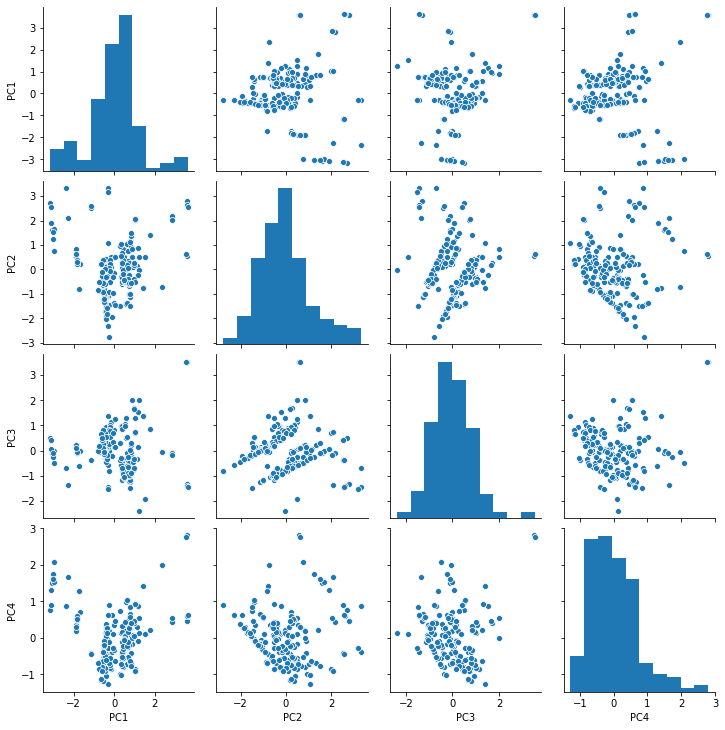

In [25]:
# "Notice how, in contrast to the input features, none of the principal components are correlated to one another."
sns.pairplot(pc_df)
plt.show()

## Pipeline

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA(n_components=2)),
    ('rf', RandomForestClassifier(max_depth=2))
])

pipe.fit(X_train, y_train)

print("Accuracy score: {:.2f}".format(pipe.score(X_test, y_test)))

vectors = pipe.steps[1][1].components_.round(2)

# Print feature effects
print('\nPC 1 effects = ' + str(dict(zip(X.columns, vectors[0]))))
print('PC 2 effects = ' + str(dict(zip(X.columns, vectors[1]))))

# PC 1 component quantifies a trade-off between class and age, for example

pipe.steps[1][1]

Accuracy score: 0.78

PC 1 effects = {'Age': -0.35, 'Fare': -0.55, 'Pclass': 0.7, 'SibSp': -0.31}
PC 2 effects = {'Age': -0.7, 'Fare': 0.4, 'Pclass': 0.21, 'SibSp': 0.55}


PCA(n_components=2)

## Segmenting a scatter plot by a categorical variable

,Sex,PC1,PC2
1,female,0.56819,0.06440
3,female,0.39583,0.16614
6,male,-0.25091,-1.43884
10,female,-2.36842,3.32101
11,female,-0.44302,-1.69599


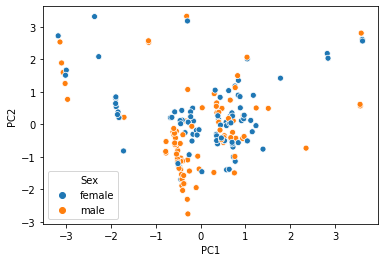

In [94]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA(n_components=2))
])

pc = pipe.fit_transform(X)
df1 = df[["Sex"]].copy()
df1["PC1"] = pc[:, 0]
df1["PC2"] = pc[:, 1]
display(df1.head())

sns.scatterplot(data=df1, x="PC1", y="PC2", hue="Sex")
plt.show()